In [33]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers

In [8]:
# Load the diabetes dataset
diabetes_dataset = load_diabetes()
print(diabetes_dataset.keys())

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


In [9]:
# Assign variables to store the data and the targets
data = diabetes_dataset['data']
targets = diabetes_dataset['target']

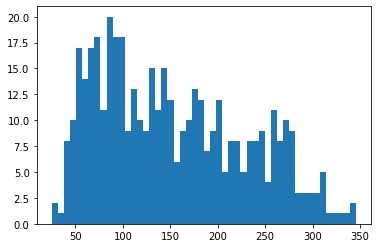

In [10]:
plt.figure(1)
plt.hist(targets, bins=50)
plt.show()

In [11]:
# Normalise the target data (this will make clearer training curves)
targets = (targets - targets.mean(axis=0)) / targets.std()

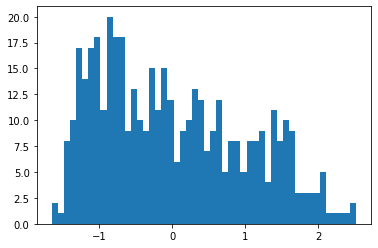

In [12]:
plt.figure(2)
plt.hist(targets, bins=50)
plt.show()

In [15]:
# Split the data into train and test sets
train_data, test_data, train_targets, test_targets = train_test_split(
    data, targets, test_size=0.1)

In [17]:
# Define a feedforward neural network
model = Sequential([
    Dense(128, activation="relu", input_shape=(train_data.shape[1], )),
    Dense(128, activation="relu"),
    Dense(128, activation="relu"),
    Dense(128, activation="relu"),
    Dense(128, activation="relu"),
    Dense(128, activation="relu"),
    Dense(1)
])

In [18]:
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1408      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1

In [19]:
# Compile the model
model.compile(optimizer="adam",
             loss="mse",
             metrics=["mae"])

In [20]:
# Train the model, with some of the data reserved for validation
history = model.fit(train_data, train_targets, validation_split=0.15,
                   epochs=100, batch_size=64)

Epoch 1/100
6/6 [==============================] - 0s 35ms/step - loss: 0.9999 - mae: 0.8567 - val_loss: 0.7345 - val_mae: 0.7185
Epoch 2/100
6/6 [==============================] - 0s 7ms/step - loss: 0.9360 - mae: 0.8275 - val_loss: 0.6714 - val_mae: 0.6934
Epoch 3/100
6/6 [==============================] - 0s 6ms/step - loss: 0.7780 - mae: 0.7448 - val_loss: 0.7074 - val_mae: 0.6993
Epoch 4/100
6/6 [==============================] - 0s 6ms/step - loss: 0.5327 - mae: 0.5883 - val_loss: 0.8073 - val_mae: 0.7461
Epoch 5/100
6/6 [==============================] - 0s 6ms/step - loss: 0.4996 - mae: 0.5564 - val_loss: 0.7139 - val_mae: 0.7299
Epoch 6/100
6/6 [==============================] - 0s 6ms/step - loss: 0.4683 - mae: 0.5645 - val_loss: 0.6381 - val_mae: 0.6255
Epoch 7/100
6/6 [==============================] - 0s 6ms/step - loss: 0.4229 - mae: 0.5094 - val_loss: 0.6768 - val_mae: 0.6592
Epoch 8/100
6/6 [==============================] - 0s 7ms/step - loss: 0.4413 - mae: 0.5283 - va

6/6 [==============================] - 0s 6ms/step - loss: 0.1315 - mae: 0.2903 - val_loss: 0.9447 - val_mae: 0.7384
Epoch 65/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0971 - mae: 0.2446 - val_loss: 0.9897 - val_mae: 0.7630
Epoch 66/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0852 - mae: 0.2371 - val_loss: 1.0477 - val_mae: 0.7873
Epoch 67/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0856 - mae: 0.2235 - val_loss: 0.9706 - val_mae: 0.7606
Epoch 68/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0854 - mae: 0.2287 - val_loss: 1.0908 - val_mae: 0.8025
Epoch 69/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0719 - mae: 0.2081 - val_loss: 1.0190 - val_mae: 0.7628
Epoch 70/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0733 - mae: 0.2089 - val_loss: 1.0998 - val_mae: 0.8148
Epoch 71/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0686 - mae: 0.1979 - val_loss

In [21]:
# Evaluate the model on the test set
model.evaluate(test_data, test_targets, verbose=2)

2/2 - 0s - loss: 0.6688 - mae: 0.6121


[0.6688295602798462, 0.6120840907096863]

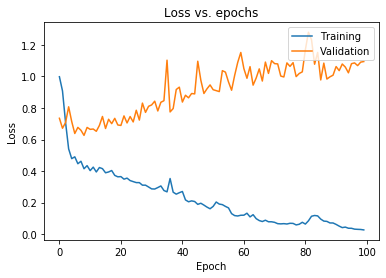

In [22]:
# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

We can clearly see that the model has significantly overfit the training dataset. We need to implement a few methods to prevent overfitting - reduce model complexity or add regularization or add early stopping.

# Add Regularization

## Add Dropout

In [28]:
wd = 1e-5  # weight decay
rate = 0.3 # dropout rate

# Define the regularized feedforward model
model = Sequential([
    Dense(128, activation="relu", kernel_regularizer=regularizers.l2(wd),
          input_shape=(train_data.shape[1],)),
    Dropout(rate),
    Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu"),
    Dropout(rate),
    Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu"),
    Dropout(rate),
    Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu"),
    Dropout(rate),
    Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu"),
    Dropout(rate),
    Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu"),
    Dropout(rate),
    Dense(1)
])

In [29]:
# Compile the model
model.compile(optimizer="adam", loss="mse",
             metrics=["mae"])

In [30]:
# Fit the model and assign a subset of the training data as validation data
history = model.fit(train_data, train_targets, validation_split=0.2,
                   epochs=100, batch_size=64)

Epoch 1/100
5/5 [==============================] - 1s 41ms/step - loss: 1.0281 - mae: 0.8637 - val_loss: 0.8665 - val_mae: 0.8039
Epoch 2/100
5/5 [==============================] - 0s 8ms/step - loss: 1.0121 - mae: 0.8551 - val_loss: 0.8481 - val_mae: 0.7977
Epoch 3/100
5/5 [==============================] - 0s 8ms/step - loss: 1.0063 - mae: 0.8535 - val_loss: 0.8179 - val_mae: 0.7917
Epoch 4/100
5/5 [==============================] - 0s 8ms/step - loss: 0.8966 - mae: 0.8143 - val_loss: 0.7571 - val_mae: 0.7666
Epoch 5/100
5/5 [==============================] - 0s 8ms/step - loss: 0.7483 - mae: 0.7416 - val_loss: 0.6660 - val_mae: 0.7043
Epoch 6/100
5/5 [==============================] - 0s 8ms/step - loss: 0.5891 - mae: 0.6277 - val_loss: 0.6829 - val_mae: 0.6633
Epoch 7/100
5/5 [==============================] - 0s 8ms/step - loss: 0.5701 - mae: 0.6105 - val_loss: 0.6431 - val_mae: 0.6331
Epoch 8/100
5/5 [==============================] - 0s 8ms/step - loss: 0.5290 - mae: 0.5911 - va

5/5 [==============================] - 0s 8ms/step - loss: 0.3916 - mae: 0.5016 - val_loss: 0.6909 - val_mae: 0.6408
Epoch 65/100
5/5 [==============================] - 0s 8ms/step - loss: 0.3688 - mae: 0.4893 - val_loss: 0.6944 - val_mae: 0.6324
Epoch 66/100
5/5 [==============================] - 0s 8ms/step - loss: 0.3808 - mae: 0.4832 - val_loss: 0.6788 - val_mae: 0.6358
Epoch 67/100
5/5 [==============================] - 0s 27ms/step - loss: 0.4074 - mae: 0.4961 - val_loss: 0.6726 - val_mae: 0.6517
Epoch 68/100
5/5 [==============================] - 0s 8ms/step - loss: 0.3998 - mae: 0.4973 - val_loss: 0.6599 - val_mae: 0.6299
Epoch 69/100
5/5 [==============================] - 0s 8ms/step - loss: 0.3884 - mae: 0.4962 - val_loss: 0.6821 - val_mae: 0.6321
Epoch 70/100
5/5 [==============================] - 0s 9ms/step - loss: 0.3825 - mae: 0.4866 - val_loss: 0.6606 - val_mae: 0.6255
Epoch 71/100
5/5 [==============================] - 0s 8ms/step - loss: 0.4163 - mae: 0.5043 - val_los

In [31]:
# Evaluate the model on the test set
model.evaluate(test_data, test_targets, verbose=2)

2/2 - 0s - loss: 0.5134 - mae: 0.5805


[0.513385534286499, 0.5804787278175354]

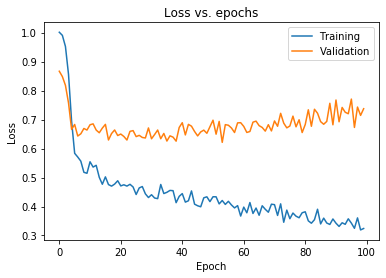

In [32]:
# Plot the regularized training and validation losses
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

By implementing dropout and weight decay we were able to reduce the overfitting. But we can see that significant overfitting is still present. Let's take a look at another regularization technique that could help us, batch normalization.

## Batch Normalization

In [37]:
rate = 0.3 # dropout rate

# Redefine the feedforward model with batch norm layers
model = Sequential([
    Dense(128, activation="relu", input_shape=(train_data.shape[1],)),
    BatchNormalization(),
    Dropout(rate),
    Dense(128, activation="relu"),
    BatchNormalization(),
    Dropout(rate),
    Dense(128, activation="relu"),
    BatchNormalization(),
    Dropout(rate),
    Dense(128, activation="relu"),
    BatchNormalization(),
    Dropout(rate),
    Dense(128, activation="relu"),
    BatchNormalization(),
    Dropout(rate),
    Dense(128, activation="relu"),
    BatchNormalization(),
    Dropout(rate),
    Dense(1)
])

There are some parameters and hyperparameters associated with batch normalisation.

The hyperparameter **momentum** is the weighting given to the previous running mean when re-computing it with an extra minibatch. By **default**, it is set to 0.99.

The hyperparameter  𝜖  is used for numeric stability when performing the normalisation over the minibatch. By **default** it is set to 0.001.

The parameters  𝛽  and  𝛾  are used to implement an affine transformation after normalisation. By **default**,  𝛽  is an all-zeros vector, and  𝛾  is an all-ones vector.

In [38]:
# Compile the model
model.compile(optimizer="adam", loss="mse",
             metrics=["mae"])

In [39]:
# Train the model
history = model.fit(train_data, train_targets, validation_split=0.2,
                   epochs=100, batch_size=64)

Epoch 1/100
5/5 [==============================] - 1s 47ms/step - loss: 3.9166 - mae: 1.6016 - val_loss: 0.8533 - val_mae: 0.7971
Epoch 2/100
5/5 [==============================] - 0s 10ms/step - loss: 2.5990 - mae: 1.2828 - val_loss: 0.8544 - val_mae: 0.7979
Epoch 3/100
5/5 [==============================] - 0s 9ms/step - loss: 2.7712 - mae: 1.3092 - val_loss: 0.8526 - val_mae: 0.7967
Epoch 4/100
5/5 [==============================] - 0s 10ms/step - loss: 2.7085 - mae: 1.2749 - val_loss: 0.8490 - val_mae: 0.7941
Epoch 5/100
5/5 [==============================] - 0s 9ms/step - loss: 1.8950 - mae: 1.0935 - val_loss: 0.8495 - val_mae: 0.7945
Epoch 6/100
5/5 [==============================] - 0s 9ms/step - loss: 2.0804 - mae: 1.1577 - val_loss: 0.8503 - val_mae: 0.7951
Epoch 7/100
5/5 [==============================] - 0s 9ms/step - loss: 2.0970 - mae: 1.1432 - val_loss: 0.8477 - val_mae: 0.7932
Epoch 8/100
5/5 [==============================] - 0s 9ms/step - loss: 1.7794 - mae: 1.0542 - 

In [40]:
# Evaluate the model on the test set
model.evaluate(test_data, test_targets, verbose=2)

2/2 - 0s - loss: 0.8672 - mae: 0.7712


[0.8671931624412537, 0.7711866497993469]

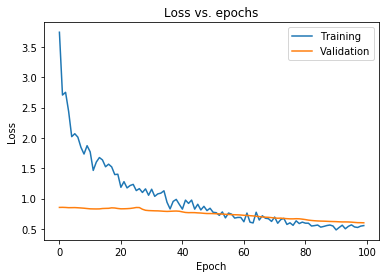

In [41]:
# Plot the regularized training and validation losses
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

Through a combination of dropout and batch normalization we were able to eliminate overfitting of the model.